In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
raw_df = pd.read_csv('./generalAccuracy_combined.csv.bz2', index_col=0)
raw_df = raw_df[raw_df['iteration'] <= 1000]

#basic_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_evaluated.csv')
#GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_reTrained_syncRank_evaluated.csv')
#full_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_fullDataset_evaluated.csv')
#full_GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_fullDataset_evaluated.csv')
#full_df['iteration'] = 500
#full_GNN_df['iteration'] = 500
#raw_df = pd.concat([basic_df, GNN_df, full_df, full_GNN_df])

#raw_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_stratified_evaluated.csv')

#raw_df = basic_df
#raw_df['bias_applied'] = True
raw_df = raw_df.rename(columns={'sampling strategy': 'sampling method', 'recovery method': 'Ranking Method'})


#### replace fairPageRank results with multigraph version

raw_df = raw_df[raw_df['Ranking Method'] != 'fairPageRank']
fairPR_multi_df = pd.read_csv('../fairpair/data/general_accuracy/generalAccuracy_fairPR_multigraph.csv')
fairPR_multi_df['Ranking Method'] = 'Fairness-Aware PageRank'
raw_df = pd.concat([raw_df, fairPR_multi_df])
raw_df = raw_df[raw_df.bias_applied]


#### replace post-processed results

fairPR_df = raw_df[raw_df['Ranking Method'] == 'Fairness-Aware PageRank'].copy()
fairPR_df = fairPR_df.replace({'Fairness-Aware PageRank': 'Fairness-Aware PageRank\n(not post-processed)'})

#raw_df = pd.read_csv('../fairpair/data/post_processing/EPIRA_10trials.csv')
raw_df = pd.read_csv('../fairpair/data/post_processing/EPIRA99_10trials.csv')
#raw_df = pd.read_csv('../fairpair/data/post_processing/FAstarIR_10trials.csv')
#raw_df = pd.read_csv('../fairpair/data/post_processing/FAstarIRp60_10trials.csv')
#raw_df = pd.read_csv('../fairpair/data/post_processing/IMDB-WIKI_EPIRA99_10trials_v2.csv')

raw_df = raw_df.rename(columns={'sampling strategy': 'sampling method', 'recovery method': 'Ranking Method'})
raw_df = pd.concat([raw_df, fairPR_df])

raw_df

,trial,iteration,value,bias_applied,sampling method,Ranking Method,metric,group
0,0,40,0.311896,False,RandomSampling,davidScore,tau,Overall
1,0,40,0.321768,False,RandomSampling,davidScore,tau,Privileged
2,0,40,0.300549,False,RandomSampling,davidScore,tau,Unprivileged
3,0,40,0.341602,False,RandomSampling,davidScore,tau,Privileged within-group
4,0,40,0.310811,False,RandomSampling,davidScore,tau,Between groups
...,...,...,...,...,...,...,...,...
23219,9,1000,0.248003,True,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Privileged within-group
23220,9,1000,0.265582,True,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Between groups
23221,9,1000,0.256473,True,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Unprivileged within-group
23222,9,1000,0.144392,True,RankSampling,Fairness-Aware PageRank\n(not post-processed),exposure,Privileged


In [29]:
sel_df2 = raw_df[raw_df.bias_applied == True].drop(columns=['bias_applied'])
sel_df2 = sel_df2.pivot(index=['trial', 'sampling method', 'Ranking Method', 'iteration'], columns=['metric', 'group'], values='value').reset_index()
sel_df2

metric trial     sampling method  Ranking Method iteration       tau  \
group                                                        Overall   
0          0  OversampleMinority         GNNRank        40  0.413185   
1          0  OversampleMinority         GNNRank        50  0.380214   
2          0  OversampleMinority         GNNRank        60  0.369694   
3          0  OversampleMinority         GNNRank        70  0.364162   
4          0  OversampleMinority         GNNRank        80  0.358778   
...      ...                 ...             ...       ...       ...   
14528      9        RankSampling  rankCentrality       960  0.308758   
14529      9        RankSampling  rankCentrality       970  0.325755   
14530      9        RankSampling  rankCentrality       980  0.324294   
14531      9        RankSampling  rankCentrality       990  0.329841   
14532      9        RankSampling  rankCentrality      1000  0.330748   

metric                                                                 \
group  Privileged Unprivileged Privileged within-group Between groups   
0        0.448784     0.390598                0.480718       0.433240   
1        0.416430     0.366465                0.422730       0.413488   
2        0.408147     0.367226                0.377783       0.421434   
3        0.402051     0.365566                0.359456       0.420271   
4        0.396732     0.365245                0.336381       0.421702   
...           ...          ...                     ...            ...   
14528    0.289275     0.353597                0.081225       0.349706   
14529    0.303426     0.373479                0.080097       0.367389   
14530    0.304322     0.372055                0.076157       0.368918   
14531    0.310722     0.377615                0.088407       0.375498   
14532    0.308912     0.378448                0.091242       0.372908   

metric                             exposure               
group  Unprivileged within-group Privileged Unprivileged  
0                       0.294983   0.148724     0.147336  
1                       0.256631   0.148663     0.147397  
2                       0.234693   0.148721     0.147339  
3                       0.231128   0.148627     0.147433  
4                       0.224720   0.148758     0.147302  
...                          ...        ...          ...  
14528                   0.361305   0.148584     0.147476  
14529                   0.385449   0.148740     0.147321  
14530                   0.378292   0.148712     0.147348  
14531                   0.381843   0.148686     0.147375  
14532                   0.389362   0.148755     0.147305  

[14533 rows x 12 columns]

In [30]:
sel_df3 = sel_df2.copy()
sel_df3['exposure ratio'] = sel_df3['exposure']['Unprivileged'] / sel_df3['exposure']['Privileged']
sel_df3['error ratio'] = sel_df3['tau']['Unprivileged'] / sel_df3['tau']['Privileged']
sel_df3['exposure difference'] = sel_df3['exposure']['Unprivileged'] - sel_df3['exposure']['Privileged']
sel_df3['error difference'] = sel_df3['tau']['Unprivileged'] - sel_df3['tau']['Privileged']
sel_df3['error'] = sel_df3['tau']['Overall']
sel_df3 = sel_df3[['trial', 'iteration', 'sampling method', 'Ranking Method', 'exposure ratio', 'error ratio', 'error',
                   'error difference', 'exposure difference']].droplevel('group', axis=1)
sel_df3 = sel_df3.replace({'OversampleMinority': 'Oversampling',
                            'oversampling': 'Oversampling',
                            'RankSampling': 'Rank-Based Sampling',
                            'rankSampling': 'Rank-Based Sampling',
                            'RandomSampling': 'Random Sampling',
                            'randomSampling': 'Random Sampling',
                            'fairPageRank': 'Fairness-Aware PageRank',
                            'davidScore': "David's Score",
                            'randomRankRecovery': 'Random Rank Recovery',
                            'rankCentrality': 'Rank Centrality',
                            'full dataset': 'Full Dataset'})

sel_df3 = sel_df3.rename(columns={'sampling method': 'Sampling Method'})
sel_df3

metric,trial,iteration,Sampling Method,Ranking Method,exposure ratio,error ratio,error,error difference,exposure difference
0,0,40,Oversampling,GNNRank,0.990667,0.870348,0.413185,-0.058186,-0.001388
1,0,50,Oversampling,GNNRank,0.991483,0.880015,0.380214,-0.049965,-0.001266
2,0,60,Oversampling,GNNRank,0.990711,0.899740,0.369694,-0.040921,-0.001381
3,0,70,Oversampling,GNNRank,0.991962,0.909251,0.364162,-0.036486,-0.001195
4,0,80,Oversampling,GNNRank,0.990213,0.920632,0.358778,-0.031488,-0.001456
...,...,...,...,...,...,...,...,...,...
14528,9,960,Rank-Based Sampling,Rank Centrality,0.992541,1.222358,0.308758,0.064323,-0.001108
14529,9,970,Rank-Based Sampling,Rank Centrality,0.990458,1.230874,0.325755,0.070053,-0.001419
14530,9,980,Rank-Based Sampling,Rank Centrality,0.990832,1.222569,0.324294,0.067733,-0.001363
14531,9,990,Rank-Based Sampling,Rank Centrality,0.991182,1.215283,0.329841,0.066893,-0.001311


In [25]:
sel_df3['Ranking Method'].unique()

array(['GNNRank', "David's Score", 'Random Rank Recovery',
       'Rank Centrality', 'Fairness-Aware PageRank\n(not post-processed)'],
      dtype=object)

In [31]:
# Okabe-Ito color palette
lightblue = "#56B4E9"
yellow = "#F0E442"
orange = "#E69F00"
green = "#009E73"
purple = "#CC79A7"
red = "#D55E00"
blue = "#0072B2"
black = "#000000"
#palette = [black, orange, lightblue, green, yellow, blue, red, purple] # original order
palette = [black, orange, lightblue, green, red, purple] # custom order

#palette = sns.color_palette('tab10')
#palette[0] = palette[7]

sns.set_context("talk") # larger font size
sns.set_style('ticks')

df = sel_df3

#ranking_methods = ['Random Rank Recovery', "David's Score", 'Rank Centrality', 'GNNRank', 'Fairness-Aware PageRank']

df = df.replace({
    'Random Rank Recovery': 'Random Rank Recovery\n& EPIRA',
    'David\'s Score': 'David\'s Score\n& EPIRA',
    'Rank Centrality': 'Rank Centrality\n& EPIRA',
    'GNNRank': 'GNNRank\n& EPIRA'
})

ranking_methods = ['Random Rank Recovery\n& EPIRA', "David's Score\n& EPIRA", 'Rank Centrality\n& EPIRA', 'GNNRank\n& EPIRA', 'Fairness-Aware PageRank\n(not post-processed)']
sampling_methods = ['Full Dataset', 'Random Sampling', 'Oversampling', 'Rank-Based Sampling']
metrics = ['exposure difference', 'error difference', 'error']

df = df[df['Ranking Method'].isin(ranking_methods)]
df = df.melt(id_vars=['Sampling Method', 'Ranking Method', 'iteration'], value_vars=['error', 'exposure difference', 'error difference'])

df['metric_order'] = df.metric.map(metrics.index)
df['sampling_order'] = df['Sampling Method'].map(sampling_methods.index)
df['ranking_order'] = df['Ranking Method'].map(ranking_methods.index) #.map(list(reversed(ranking_methods)).index)
df = df.sort_values(by=['ranking_order', 'sampling_order', 'metric_order']).drop(columns=['ranking_order', 'sampling_order', 'metric_order'])
df

,Sampling Method,Ranking Method,iteration,metric,value
15302,Random Sampling,Random Rank Recovery\n& EPIRA,30,exposure difference,-0.000006
15303,Random Sampling,Random Rank Recovery\n& EPIRA,40,exposure difference,-0.000438
15304,Random Sampling,Random Rank Recovery\n& EPIRA,50,exposure difference,-0.001052
15305,Random Sampling,Random Rank Recovery\n& EPIRA,60,exposure difference,-0.000089
15306,Random Sampling,Random Rank Recovery\n& EPIRA,70,exposure difference,-0.001036
...,...,...,...,...,...
14138,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),960,error,0.261310
14139,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),970,error,0.260732
14140,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),980,error,0.260027
14141,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),990,error,0.258920


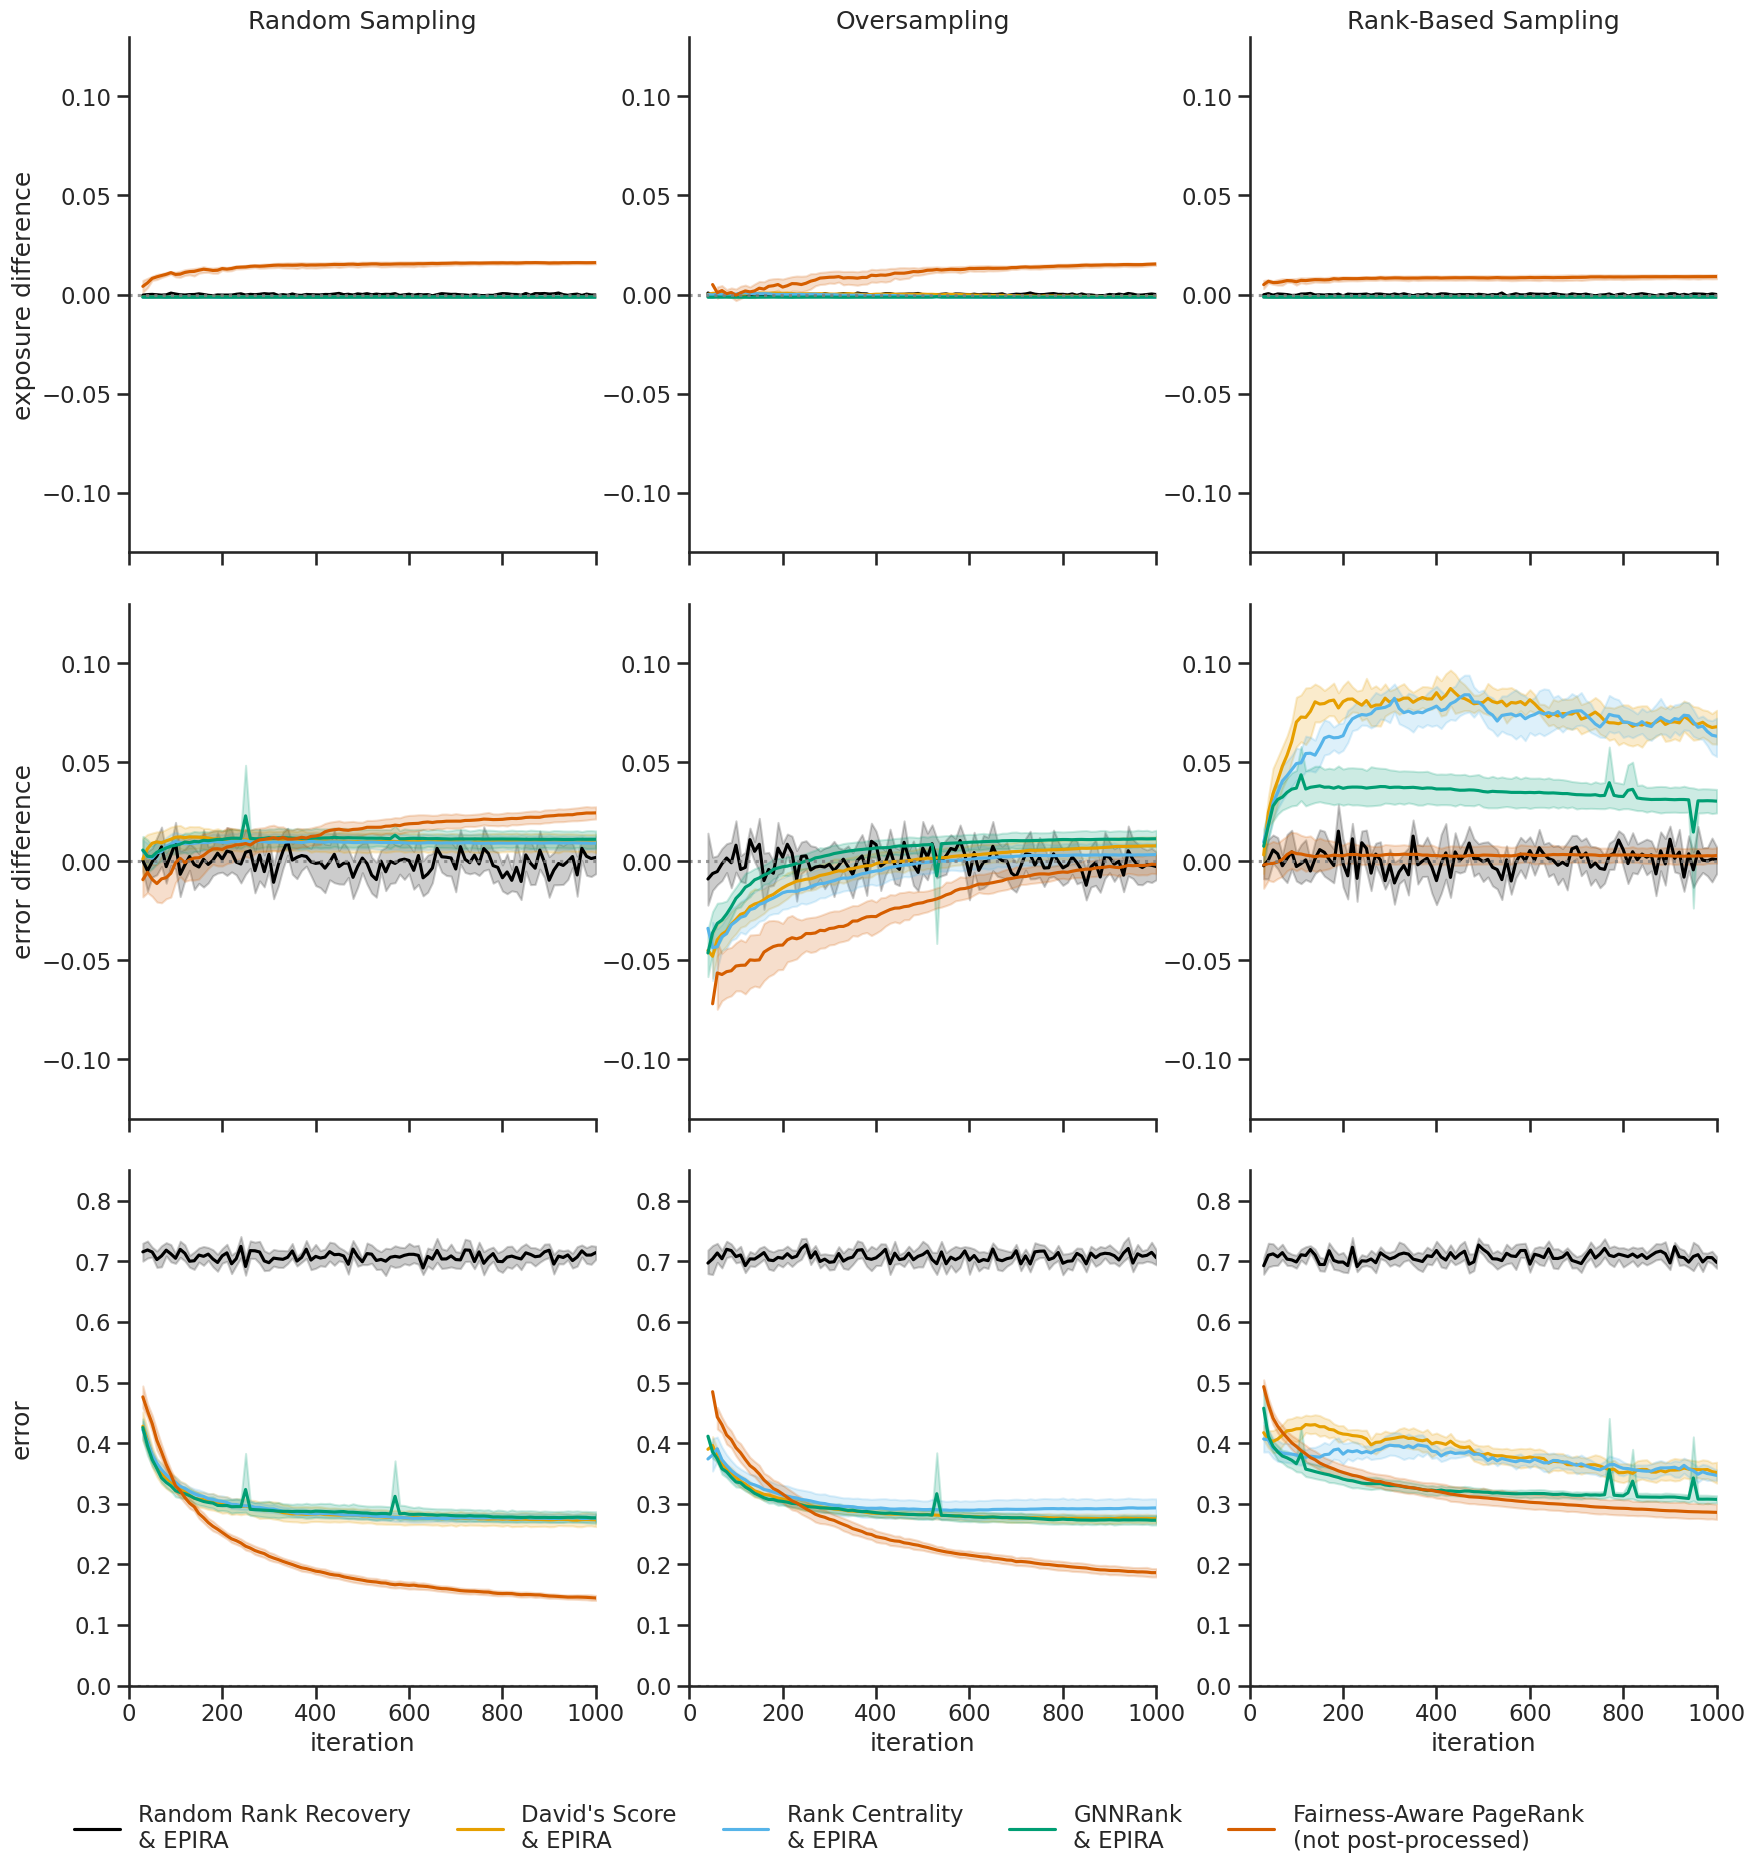

In [32]:
with sns.color_palette(palette):
    g = sns.relplot(df, x='iteration', y='value', col='Sampling Method', row='metric', hue='Ranking Method', kind='line',
                    facet_kws={'sharey': False}, aspect=1/1, height=6)

sns.move_legend(g, 'upper center', ncol=5, title=None, bbox_to_anchor=(0.393, 0))

g.refline(y=0, linestyle='dotted', alpha=0.8)
g.figure.subplots_adjust(wspace=0.2, hspace=0.1)

for (row_val, col_val), ax in g.axes_dict.items():
    ax.set_xticks([0,200,400,600,800,1000])
    ax.set_xlim((0,1000))

    if row_val == 'error':
        ax.set(ylim=(0,0.85), yticks=[0,.1,.2,.3,.4,.5,.6,.7,.8])
    else:
        ax.set(ylim=(-0.13,0.13), yticks=[-0.1,-0.05,0,0.05,0.1])  # for simulated data
        #ax.set(ylim=(-0.025,0.025), yticks=[-0.02,-0.01,0,0.01,0.02])  # for IMDB-WIKI
    
    if row_val == 'exposure difference': ax.set_title(col_val)
    else: ax.set_title(None)

    #if row_val == 'Rank-Based Sampling': ax.set_xlabel('iteration')

    if col_val == 'Random Sampling':
        if row_val == 'error':
            ax.set_ylabel(row_val, rotation=90, labelpad=29.5)
        else: ax.set_ylabel(row_val, rotation=90)

plt.savefig('../fairpair/data/combined_plots/EPIRA99_results_lineplots_multigraph.png', dpi=300, bbox_inches="tight")